In [106]:
import wikipedia
import wikipediaapi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import display
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Data Cleaning

In [2]:
## take all article in category (max_level control the depthness of articles taken from the subcategories)
def print_categorymembers(categorymembers, level=0, max_level=1):
    list_articles = []
    for c in categorymembers.values():
        if c.ns == 0:
            list_articles.append(c) 
            ##print("%s: %s (ns: %d)" % ("*" * (level + 1), c.title, c.ns))
        elif level < max_level and c.ns == 14:
            sub_list = []
            sub_list = print_categorymembers(c.categorymembers, level=level + 1, max_level=max_level)
            list_articles = list_articles + sub_list
    return list_articles

In [3]:
wiki_wiki = wikipediaapi.Wikipedia('en')
cat1 = wiki_wiki.page("Category:Religion")
cat2 = wiki_wiki.page("Category:Science")

In [4]:
religion_articles = print_categorymembers(cat1.categorymembers)
science_articles = print_categorymembers(cat2.categorymembers)

## This cell is about the hyperlink of articles but not relevant anymore

In [5]:
## Create the adjacency matrix
def make_links(list_articles):
    matrix = np.zeros((len(list_articles), len(list_articles)))
    compt = 0
    for article in list_articles:
        for link in article.links:
            for i in range(len(list_articles)):
                if (link == list_articles[i].title):
                    matrix[compt,i] = 1
    return matrix
adjacency_matrix = make_links(list_articles)
num_edges = np.count_nonzero(adjacency_matrix)
print(f"Number of edges in the feature graph: {num_edges}")

NameError: name 'list_articles' is not defined

In [6]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lucaseckes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lucaseckes/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
#Take all the words present in the articles that are not stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop1 = ['====', '===', '==', '<<', '>>', "''", '``', "'s" , '\displaystyle', '...', '\phi', '\mu', '\mathbf', '--', 'x_',
        '\alpha', '\dot', '\hat', '\lambda', '\left', '\right', 'matcal', '\nu', '\partial']
stop2 = stopwords.words('english')
stop = stop1+stop2
wikipedia.set_lang('en')

def take_words(list_articles, is_title = False) :
    words_df = pd.DataFrame(columns=['article', 'words'])
    for i in range(len(list_articles)):
        if (i%10 == 0) :
            print(i)
        try: 
            if (is_title == False):
                page = wikipedia.page(list_articles[i].title)
            else:
                page = wikipedia.page(list_articles[i])
        except wikipedia.DisambiguationError as e:
            s = e.options
            s = list(filter(lambda x : x != "", s))
            try :
                page = wikipedia.page(s)
            except wikipedia.DisambiguationError as e:
                pass
        except wikipedia.PageError:
            pass
        words = word_tokenize(page.content)
        words = [elem.lower() for elem in words]
        words = [elem for elem in words if len(elem) > 1 and elem.isdigit() == False]
        words_wostop = [x for x in words if x not in stop]
        words_wostop = [elem.lower() for elem in words_wostop]
        if (is_title == False):
            words_df.loc[i] = [list_articles[i].title] + [words_wostop]
        else:
            words_df.loc[i] = [list_articles[i]] + [words_wostop]
    return words_df

In [8]:
religion_df = take_words(religion_articles)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380


/Users/lucaseckes/miniconda2/envs/ntds_2019/lib/python3.7/site-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /Users/lucaseckes/miniconda2/envs/ntds_2019/lib/python3.7/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800


In [129]:
science_df = take_words(science_articles)

0
10
20
30
40
50
60
70
80
90
100


/Users/lucaseckes/miniconda2/envs/ntds_2019/lib/python3.7/site-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /Users/lucaseckes/miniconda2/envs/ntds_2019/lib/python3.7/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650


In [130]:
labels_df = pd.DataFrame(columns = ['title', 'label'])
for i in range(len(religion_df)):
    labels_df.loc[i] = [religion_df['article'].iloc[i]] + [0]
for j in range(len(religion_df), len(religion_df) + len(science_df)):
    labels_df.loc[j] = [science_df['article'].iloc[j-len(religion_df)]] + [1]  
labels_df = labels_df.drop_duplicates('title')

In [131]:
words_df = pd.concat([religion_df, science_df])

/Users/lucaseckes/miniconda2/envs/ntds_2019/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


## Scikit TF-IDF

In [132]:
def TF_IDF(words_df, nb_words):
    #remove strings like "10,000"
    #religion_df['words'] = religion_df['words'].apply(lambda word_list: list(filter(lambda word: (',' not in word), word_list)))
    #only keep strings that contain alphabet chars
    words_df['words'] = words_df['words'].apply(lambda word_list: list(filter(lambda word: word.isalpha(), word_list)))
    # create a column with all words concatenated
    words_df['words_string'] = words_df['words'].apply(lambda words_list: " ".join(words_list))

    cv=CountVectorizer()
    word_count_vector=cv.fit_transform(words_df['words_string'])

    tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
    tfidf_transformer.fit(word_count_vector)
 
    # count matrix
    count_vector=cv.transform(words_df['words_string'])
 
    # tf-idf scores
    tf_idf_vector=tfidf_transformer.transform(count_vector)

    feature_names = cv.get_feature_names()
 
    #get tfidf vector for first document
    first_document_vector=tf_idf_vector[0]
 
    #print the scores
    df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
    df = df.sort_values(by=["tfidf"],ascending=False).head(500)
    return df

In [146]:
TF_IDF_religion = TF_IDF(religion_df, 500)
TF_IDF_science = TF_IDF(science_df, 500)
important_words_df = pd.concat([TF_IDF_religion, TF_IDF_science])
important_words_df['words'] = important_words_df.index
important_words_df = important_words_df.drop_duplicates(subset = ['words'])
important_words_df.sort_values(['tfidf'], ascending = False)

,tfidf,words
religion,0.458431,religion
religions,0.297373,religions
religious,0.222238,religious
knowledge,0.172203,knowledge
research,0.149120,research
...,...,...
inventor,0.015033,inventor
urban,0.015033,urban
independent,0.015029,independent
poll,0.014923,poll


In [149]:
def make_features(words):
    explode_df = words.explode('words')
    explode_df['exist'] = np.ones(len(explode_df))
    df = pd.DataFrame(words['article']).assign(key = 1).merge(pd.DataFrame(important_words_df['words']).assign(key = 1), on = 'key').drop('key', 1)
    df2 = df.merge(explode_df, on = ['article','words'] , how = 'left').drop_duplicates().fillna(0)
    df3 = pd.pivot_table(df2, values = 'exist',  index = 'article', columns=['words'])
    display(df3.head(10))
    features = df3.values
    return features

In [150]:
features = make_features(words_df)

words,aboriginal,abrahamic,abstract,academic,academies,academy,acceptance,accepts,according,achievements,...,world,worldwide,worship,would,writings,written,ziman,zoroastrianism,émile,đài
article,,,,,,,,,,,,,,,,,,,,,
1888–1893 Uprisings of Hazaras,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2003 Quetta mosque bombing,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2004 Quetta Ashura massacre,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017–19 Iranian protests against compulsory hijab,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2019 Indian Science Congress pseudoscience controversies,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21 grams experiment,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
A Briefer History of Time (Schulman book),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
A Guide to the Scientific Knowledge of Things Familiar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
A Letter Concerning Toleration,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


# Graph

In [151]:
distances = np.array([[(np.sum((features[i,:]-features[j,:])**2)) for i in range(0,features.shape[0]) ] for j in range(0,features.shape[0])]).reshape(features.shape[0],-1)

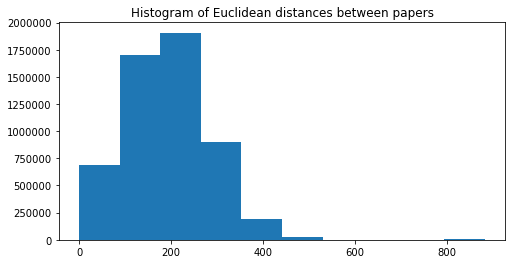

In [152]:
plt.figure(1, figsize=(8, 4))
plt.title("Histogram of Euclidean distances between papers")
plt.hist(distances.flatten());

In [153]:
feat = distances/np.max(distances)
np.fill_diagonal(feat, 0)

In [154]:
graph = nx.from_numpy_matrix(feat)

In [ ]:
giant_feature = max(nx.connected_component_subgraphs(graph), key=len)
print('The giant component of the feature graph has {} nodes and {} edges.'.format(giant_feature.number_of_nodes(), giant_feature.size()))

In [ ]:
nx.average_clustering(graph)

In [155]:
def epsilon_similarity_graph(X: np.ndarray, sigma=1, epsilon=0):
    """ X (n x d): coordinates of the n data points in R^d.
        sigma (float): width of the kernel
        epsilon (float): threshold
        Return:
        adjacency (n x n ndarray): adjacency matrix of the graph.
    """
    adjacency = squareform(pdist(X))
    adjacency = np.exp((- adjacency**2)/(2 * sigma**2))
    adjacency[adjacency < epsilon] = 0
    #according to the formula on slide 11 in the spectral clustering lecture, we set the diagonal to 0
    np.fill_diagonal(adjacency,0)
    return adjacency

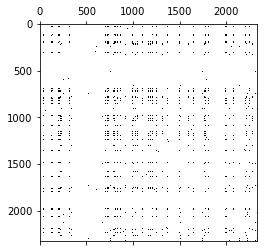

In [204]:
from scipy.spatial.distance import pdist, squareform
adjacency = epsilon_similarity_graph(feat, sigma= 2*np.mean(feat), epsilon=0.60)
plt.spy(adjacency)
plt.show()

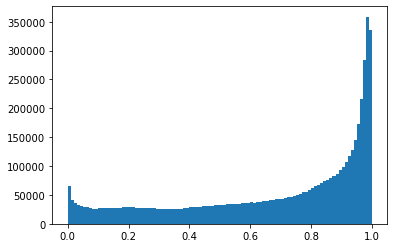

In [205]:
temp = np.exp((- squareform(pdist(feat))**2)/(2 * (1.5 * np.median(pdist(feat)))**2))
plt.hist(temp.flatten(),bins=100);

In [ ]:
import operator
pr = nx.pagerank(graph)
sorted_pr = sorted(pr.items(), key=operator.itemgetter(1), reverse = True)

In [ ]:
sorted_pr[:10]

In [ ]:
list_articles[794]

In [166]:
def compute_laplacian(adjacency: np.ndarray, normalize: bool):
    """ Return:
        L (n x n ndarray): combinatorial or symmetric normalized Laplacian.
    """
    degrees_l = np.sum(adjacency,axis=1)
    if(not normalize):
        degrees = np.zeros(adjacency.shape)
        np.fill_diagonal(degrees,degrees_l)
        return degrees - adjacency 
    else:
        degrees = np.sqrt(np.array([degrees_l]).T @ np.array([degrees_l]))
        L = - adjacency/degrees
        np.fill_diagonal(L,np.ones(len(adjacency)))
        return L

In [167]:
def spectral_decomposition(laplacian: np.ndarray):
    """ Return:
        lamb (np.array): eigenvalues of the Laplacian
        U (np.ndarray): corresponding eigenvectors.
    """
    values, vectors = np.linalg.eig(laplacian)
    sorted_indices = np.argsort(values)
    return values[sorted_indices], vectors[:,sorted_indices]
    # Your code here

In [171]:
laplacian = compute_laplacian(adjacency, normalize=True)
lam, U = spectral_decomposition(np.nan_to_num(laplacian))

/Users/lucaseckes/miniconda2/envs/ntds_2019/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


In [172]:
def GFT(signal: np.ndarray):
    fourier = U.transpose()@signal
    return fourier

def iGFT(fourier_coefficients: np.ndarray):
    signal = U@fourier_coefficients
    return signal

In [181]:
alpha = 0.99 / np.max(lam)

ideal_tk =  1/(1 + alpha*lam)

In [182]:
def ideal_graph_filter(x: np.ndarray, spectral_response: np.ndarray):
    """Return a filtered signal."""
    fourier = GFT(x);
    h = np.diag(spectral_response)
    filtered_graph = U@h@fourier
    return filtered_graph

In [183]:
filt = ideal_graph_filter(adjacency.tolist(),ideal_tk)

In [184]:
graph_filt = nx.from_numpy_matrix(filt)

In [ ]:
options = {
    'node_color': 'black',
    'node_size': 20,
    'line_color': 'grey',
    'linewidths': 0.2,
    'width': 0.3,
}
nx.draw(graph, **options)

In [ ]:
options = {
    'node_color': 'black',
    'node_size': 20,
    'line_color': 'grey',
    'linewidths': 0.2,
    'width': 0.3,
}
nx.draw(graph_filt, **options)

In [ ]:
giant_features = max(nx.connected_component_subgraphs(graph_filt), key = len)

In [ ]:
options = {
    'node_color': 'black',
    'node_size': 20,
    'line_color': 'grey',
    'linewidths': 0.2,
    'width': 0.3,
}
nx.draw(giant_features, **options)

In [ ]:
giant_features.nodes

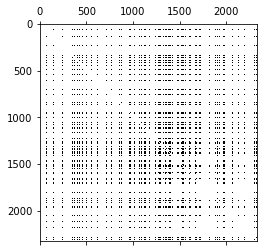

In [196]:
from scipy.spatial.distance import pdist, squareform
adjacency_filt = epsilon_similarity_graph(filt, sigma= 2*np.mean(feat), epsilon=0.60)
plt.spy(adjacency)
plt.show()

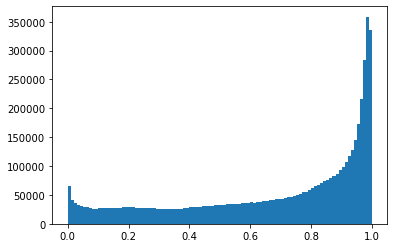

In [197]:
temp = np.exp((- squareform(pdist(feat))**2)/(2 * (1.5 * np.median(pdist(feat)))**2))
plt.hist(temp.flatten(),bins=100);

In [173]:
def laplacian_eigenmaps(X:np.ndarray, dim: int, sigma: float, epsilon: float, normalize: bool):
    """ Return:
        coords (n x dim array): new coordinates for the data points."""
    adjacency = epsilon_similarity_graph(X, sigma, epsilon)
    laplacian = compute_laplacian(adjacency, normalize)
    eigenvalues, eigenvectors = spectral_decomposition(np.nan_to_num(laplacian)) 
    return (eigenvectors[:,1:dim+1])

In [200]:
twoD_embeddings = laplacian_eigenmaps(feat, dim=2, sigma= 2*np.mean(feat), epsilon=0.60, normalize=True)

/Users/lucaseckes/miniconda2/envs/ntds_2019/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


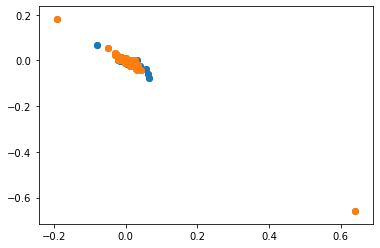

In [201]:
plt.scatter(twoD_embeddings[0:800,0], twoD_embeddings[0:800,1], label=1)
plt.scatter(twoD_embeddings[800:2650,0], twoD_embeddings[800:2650,1], label=2)

In [208]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2)
x_embed = tsne.fit_transform(adjacency)

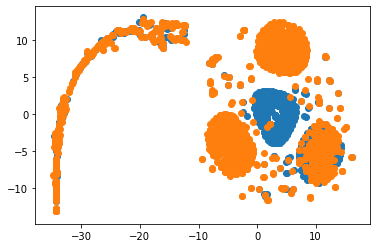

In [209]:
plt.scatter(x_embed[0:800,0], x_embed[0:800,1], label=1)
plt.scatter(x_embed[800:2650,0], x_embed[800:2650,1], label=2)

In [210]:
import time

import torch
import torch.nn as nn
import torch.nn.functional as F

from dgl import DGLGraph
import dgl.function as fn

np.random.seed(0)
torch.manual_seed(1)

In [211]:
class LaplacianPolynomial(nn.Module):
    def __init__(self,
                 in_feats: int,
                 out_feats: int,
                 k: int,
                 dropout_prob: float,
                 norm=True):
        super().__init__()
        self._in_feats = in_feats
        self._out_feats = out_feats
        self._k = k
        self._norm = norm
        # Contains the weights learned by the Laplacian polynomial
        self.pol_weights = nn.Parameter(torch.Tensor(self._k + 1))
        # Contains the weights learned by the logistic regression (without bias)
        self.logr_weights = nn.Parameter(torch.Tensor(in_feats, out_feats))
        self.dropout = nn.Dropout(p=dropout_prob)
        self.reset_parameters()

    def reset_parameters(self):
        """Reinitialize learnable parameters."""
        torch.manual_seed(0)
        torch.nn.init.xavier_uniform_(self.logr_weights, gain=0.01)
        torch.nn.init.normal_(self.pol_weights, mean=0.0, std=1e-3)

    def forward(self, graph, feat):
        r"""Compute graph convolution.

        Notes
        -----
        * Input shape: :math:`(N, *, \text{in_feats})` where * means any number of additional
          dimensions, :math:`N` is the number of nodes.
        * Output shape: :math:`(N, *, \text{out_feats})` where all but the last dimension are
          the same shape as the input.

        Parameters
        ----------
        graph (DGLGraph) : The graph.
        feat (torch.Tensor): The input feature

        Returns
        -------
        (torch.Tensor) The output feature
        """
        feat = self.dropout(feat)
        graph = graph.local_var()
        
        # D^(-1/2)
        norm = torch.pow(graph.in_degrees().float().clamp(min=1), -0.5)
        shp = norm.shape + (1,) * (feat.dim() - 1)
        norm = torch.reshape(norm, shp)

        # mult W first to reduce the feature size for aggregation.
        feat = torch.matmul(feat, self.logr_weights)

        result = self.pol_weights[0] * feat.clone()

        for i in range(1, self._k + 1):
            old_feat = feat.clone()
            if self._norm:
                feat = feat * norm
            graph.ndata['h'] = feat
            # Feat is not modified in place
            graph.update_all(fn.copy_src(src='h', out='m'),
                             fn.sum(msg='m', out='h'))
            if self._norm:
                graph.ndata['h'] = graph.ndata['h'] * norm

            feat = old_feat - graph.ndata['h']
            result += self.pol_weights[i] * feat

        return result

    def extra_repr(self):
        """Set the extra representation of the module,
        which will come into effect when printing the model.
        """
        summary = 'in={_in_feats}, out={_out_feats}'
        summary += ', normalization={_norm}'
        return summary.format(**self.__dict__)

In [212]:
def train(model, g, features, labels, loss_fcn, train_mask, optimizer):
    model.train()  # Activate dropout
    
    logits = model(g, features)
    loss = loss_fcn(logits[train_mask], labels[train_mask])

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    return loss

def evaluate(model, g, features, labels, mask):
    model.eval()  # Deactivate dropout
    with torch.no_grad():
        logits = model(g, features)[mask]  # only compute the evaluation set
        labels = labels[mask]
        _, indices = torch.max(logits, dim=1)
        correct = torch.sum(indices == labels)
        return correct.item() * 1.0 / len(labels)
       
def test_articles(model, g, features, mask):
    model.eval()  # Deactivate dropout
    with torch.no_grad():
        logits = model(g, features)[mask] 
        _, indices = torch.max(logits, dim=1)
        return indices

In [213]:
from sklearn.model_selection import train_test_split
x1, x2, y1, y2, idx1, idx2 = train_test_split(
    feat, labels_df['label'], range(feat.shape[1]), test_size=0.4)
x3, x4, y3, y4, idx3, idx4 = train_test_split(
    x2, y2, idx2, test_size=0.5)

In [214]:
train_df = pd.DataFrame(np.column_stack((idx1, np.ones(len(idx1)).T)), columns = ['idx', 'indices'])
train_ = labels_df.merge(train_df, left_index = True, right_on = 'idx', how = 'left').fillna(0)
val_df = pd.DataFrame(np.column_stack((idx3, np.ones(len(idx3)).T)), columns = ['idx', 'indices'])
val_ = labels_df.merge(val_df, left_index = True, right_on = 'idx', how = 'left').fillna(0)
test_df = pd.DataFrame(np.column_stack((idx4, np.ones(len(idx4)).T)), columns = ['idx', 'indices'])
test_ = labels_df.merge(val_df, left_index = True, right_on = 'idx', how = 'left').fillna(0)

In [217]:
in_feats = feat.shape[1] 
n_classes = 2
pol_order = 3
lr = 0.2
weight_decay = 5e-6
n_epochs = 100
p_dropout = 0.8
features_ = torch.FloatTensor(feat) 
labels = torch.LongTensor(labels_df['label']) 
train_mask = torch.BoolTensor(train_['indices'])
val_mask = torch.BoolTensor(val_['indices'])
test_mask = torch.BoolTensor(test_['indices'])

In [ ]:
model = LaplacianPolynomial(in_feats, n_classes, pol_order, p_dropout)

graph = DGLGraph(graph)

loss_fcn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=lr,
                             weight_decay=weight_decay)

dur = []
for epoch in range(n_epochs):
    if epoch >= 3:
        t0 = time.time()
    loss = train(model, graph, features_, labels, loss_fcn, train_mask, optimizer)

    if epoch >= 3:
        dur.append(time.time() - t0)

    acc = evaluate(model, graph, features_, labels, val_mask)
    print("Epoch {:05d} | Time(s) {:.4f} | Train Loss {:.4f} | Val Accuracy {:.4f}". format(
            epoch, np.mean(dur), loss.item(), acc))

print()
acc = evaluate(model, graph, features_, labels, test_mask)
print("Test Accuracy {:.4f}".format(acc))

Epoch 00000 | Time(s) nan | Train Loss 0.6932 | Val Accuracy 0.4163
Epoch 00001 | Time(s) nan | Train Loss 26.8124 | Val Accuracy 0.4140
Epoch 00002 | Time(s) nan | Train Loss 1.9271 | Val Accuracy 0.4231
Epoch 00003 | Time(s) 0.1894 | Train Loss 5.7088 | Val Accuracy 0.4140
Epoch 00004 | Time(s) 0.1897 | Train Loss 15.0766 | Val Accuracy 0.4140
Epoch 00005 | Time(s) 0.1894 | Train Loss 11.5277 | Val Accuracy 0.4095
Epoch 00006 | Time(s) 0.1893 | Train Loss 3.4021 | Val Accuracy 0.4208
Epoch 00007 | Time(s) 0.1890 | Train Loss 0.7053 | Val Accuracy 0.4163
Epoch 00008 | Time(s) 0.1894 | Train Loss 3.4023 | Val Accuracy 0.4118
Epoch 00009 | Time(s) 0.1898 | Train Loss 7.5269 | Val Accuracy 0.4095
Epoch 00010 | Time(s) 0.1899 | Train Loss 7.3734 | Val Accuracy 0.3891


In [ ]:
coeff_gcn =  model.pol_weights.data.numpy()
print(coeff_gcn)

In [ ]:
model

In [38]:
def polynomial_graph_filter_response(coeff: np.array, lam: np.ndarray):
    """ Return an array of the same shape as lam.
        response[i] is the spectral response at frequency lam[i]. """
    # Your code here
    V = np.vander(lam, len(coeff), increasing=True)
    return V@coeff

In [39]:
plt.semilogy(lam, np.abs(polynomial_graph_filter_response(coeff_gcn, lam)))
plt.xlabel('$\lambda$')
plt.ylabel('Spectral response (db)')

NameError: name 'lam' is not defined

In [40]:
list_articles = ["God", "Network Science"]
test_df = take_words(list_articles, is_title = True)

0


In [71]:
test = make_features(test_df)
features_final = np.concatenate((features, test))

words,ability,able,academic,academy,access,according,act,action,acts,acupuncture,...,worship,would,writing,written,wrote,year,years,yoga,york,young
article,,,,,,,,,,,,,,,,,,,,,
God,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
Network Science,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [77]:
distances = np.array([[(np.sum((features_final[i,:]-features_final[j,:])**2)) for i in range(0,features_final.shape[0]) ] for j in range(0,features_final.shape[0])]).reshape(features_final.shape[0],-1)
feat = distances/np.max(distances)
np.fill_diagonal(feat, 0)
graph = nx.from_numpy_array(feat)
graph = DGLGraph(graph)
features_ = torch.FloatTensor(feat)

In [78]:
mask1 = np.zeros((len(features)))
mask2 = np.ones((len(test)))
mask = np.concatenate((mask1,mask2))
mask = torch.BoolTensor(mask)

In [80]:
test_articles(model, graph, features_, mask)

RuntimeError: size mismatch, m1: [2332 x 2332], m2: [2330 x 2] at /Users/distiller/project/conda/conda-bld/pytorch_1565272526878/work/aten/src/TH/generic/THTensorMath.cpp:752

In [94]:
model.pol_weights

Parameter containing:
tensor([-0.0014,  0.0002, -0.0007, -0.0007], requires_grad=True)

In [95]:
model.logr_weights

Parameter containing:
tensor([[-3.7960e-06,  2.7199e-04],
        [-4.1730e-04, -3.7314e-04],
        [-1.9528e-04,  1.3596e-04],
        ...,
        [-9.9741e-05,  1.0228e-04],
        [-3.6750e-04,  3.6437e-04],
        [-4.6162e-04, -2.4012e-04]], requires_grad=True)

In [85]:
len(mask)

2332